In [1]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from datasets import DatasetDict, concatenate_datasets

In [2]:
dataset = load_dataset("/home/sebastian/Documents/Hauptprojekt/Daten_sorted")

Resolving data files:   0%|          | 0/107394 [00:00<?, ?it/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 107394
    })
})

In [6]:
id2label = {
  0: "credit_note",
  1: "debit_note",
  2: "order",
  3: "proforma",
  4: "purchase_order",
  5: "receipt",
  6: "sales_order",
  7: "tax_invoice",
  8: "utility_bill"
}


train_datasets, test_datasets = [], []

In [8]:
def check_label(examples, label_index):
    booleans = []
    for label in examples['label']:
        try:
            if label == label_index:
                booleans.append(True)
            else:
                booleans.append(False)
        except:
            booleans.append(False)

    return booleans

# for each class: filter the dataset on documents with that class
# and then use the first 10 for training, and the last 10 for testing
for id in id2label.keys():
    # filter dataset on particular label
    filtered_dataset = dataset.filter(check_label, fn_kwargs={'label_index':id}, batched=True)
    trainlen = int(filtered_dataset["train"].num_rows*0.8)
    totallen = int(filtered_dataset["train"].num_rows)
    print(trainlen)
    # select first 10 examples for training
    filted_train_dataset = filtered_dataset["train"].select(range(trainlen))
    train_datasets.append(filted_train_dataset)
    # select last 10 examples for testing
    filted_test_dataset = filtered_dataset["train"].select(range(trainlen, totallen))
    test_datasets.append(filted_test_dataset)

28
5
22426
26
2534
896
1697
58285
14


In [10]:
test_datasets[0]

Dataset({
    features: ['image', 'label'],
    num_rows: 7
})

In [12]:
toy_dataset = DatasetDict({"train": concatenate_datasets(train_datasets),
                           "test": concatenate_datasets(test_datasets)
                           })

In [13]:
toy_dataset["test"][144]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1654x2339>,
 'label': 2}

In [14]:
# note that, in case you use the private hub, you can just add `private=True`
toy_dataset.push_to_hub("ZaNioxX/DocILE_10_5_ImageClassification", private=True)

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/50 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1719 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1718 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1718 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1718 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1718 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1718 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1718 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1718 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1718 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1718 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1718 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/1718 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

Map:   0%|          | 0/2149 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/10 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/22 [00:00<?, ?ba/s]

Map:   0%|          | 0/2149 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/22 [00:00<?, ?ba/s]

Map:   0%|          | 0/2149 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/22 [00:00<?, ?ba/s]

Map:   0%|          | 0/2148 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/22 [00:00<?, ?ba/s]

Map:   0%|          | 0/2148 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/22 [00:00<?, ?ba/s]

Map:   0%|          | 0/2148 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/22 [00:00<?, ?ba/s]

Map:   0%|          | 0/2148 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/22 [00:00<?, ?ba/s]

Map:   0%|          | 0/2148 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/22 [00:00<?, ?ba/s]

Map:   0%|          | 0/2148 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/22 [00:00<?, ?ba/s]

Map:   0%|          | 0/2148 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/22 [00:00<?, ?ba/s]

In [15]:
dataset = load_dataset("ZaNioxX/DocILE_10_5_ImageClassification")

Resolving data files:   0%|          | 0/50 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/50 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/21483 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/85939 [00:00<?, ? examples/s]

In [16]:
dataset

DatasetDict({
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 21483
    })
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 85939
    })
})

## Prepare Donut format

In [17]:
template = '{"gt_parse": {"class" : '

In [18]:
id2label = {
  0: "credit_note",
  1: "debit_note",
  2: "order",
  3: "proforma",
  4: "purchase_order",
  5: "receipt",
  6: "sales_order",
  7: "tax_invoice",
  8: "utility_bill"
}


def update_examples(examples):
    ground_truths = []
    for label in examples['label']:
        ground_truths.append(template + '"' + id2label[label] + '"' + "}}")

    examples['ground_truth'] = ground_truths

    return examples

dataset = dataset.map(update_examples, batched=True)
     

Map:   0%|          | 0/21483 [00:00<?, ? examples/s]

Map:   0%|          | 0/85939 [00:00<?, ? examples/s]

In [24]:
test = dataset['train'][440]['ground_truth']
test

'{"gt_parse": {"class" : "order"}}'

In [25]:
from ast import literal_eval

test2 = literal_eval(test)
test2['gt_parse']

{'class': 'order'}

In [26]:
dataset

DatasetDict({
    test: Dataset({
        features: ['image', 'label', 'ground_truth'],
        num_rows: 21483
    })
    train: Dataset({
        features: ['image', 'label', 'ground_truth'],
        num_rows: 85939
    })
})

In [28]:
dataset.push_to_hub("ZaNioxX/DocILE_10_5_ImageClassification_donut", private=True)

Map:   0%|          | 0/2387 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/9 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/24 [00:00<?, ?ba/s]

Map:   0%|          | 0/2387 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/24 [00:00<?, ?ba/s]

Map:   0%|          | 0/2387 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/24 [00:00<?, ?ba/s]

Map:   0%|          | 0/2387 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/24 [00:00<?, ?ba/s]

Map:   0%|          | 0/2387 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/24 [00:00<?, ?ba/s]

Map:   0%|          | 0/2387 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/24 [00:00<?, ?ba/s]

Map:   0%|          | 0/2387 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/24 [00:00<?, ?ba/s]

Map:   0%|          | 0/2387 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/24 [00:00<?, ?ba/s]

Map:   0%|          | 0/2387 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/24 [00:00<?, ?ba/s]

Map:   0%|          | 0/2686 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/32 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2686 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2686 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2686 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2686 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2686 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2686 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2686 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2686 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2686 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2686 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2686 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2686 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2686 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2686 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2686 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2686 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2686 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2686 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2685 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2685 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2685 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2685 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2685 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2685 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2685 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2685 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2685 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2685 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2685 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2685 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Map:   0%|          | 0/2685 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

## Load dataset

In [2]:
dataset_donut = load_dataset("ZaNioxX/DocILE_10_5_ImageClassification_donut")

Resolving data files:   0%|          | 0/32 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/32 [00:00<?, ?it/s]

In [3]:
id2label = {id: label for id, label in enumerate(dataset_donut['train'].features['label'].names)}
print(id2label)

{0: 'credit_note', 1: 'debit_note', 2: 'order', 3: 'proforma', 4: 'purchase_order', 5: 'receipt', 6: 'sales_order', 7: 'tax_invoice', 8: 'utility_bill'}


In [4]:
from transformers import VisionEncoderDecoderConfig

max_length = 8
# image_size = [2560, 1920]
# let's use a smaller image size (height, width) because otherwise OOM
# the higher the resolution, the better the results will be
# so if you have a big GPU, feel free to increase
#image_size = [1280, 960]
image_size = [427, 320]


# update image_size of the encoder
# during pre-training, a larger image size was used
config = VisionEncoderDecoderConfig.from_pretrained("nielsr/donut-base")
config.encoder.image_size = image_size # (height, width)
# update max_length of the decoder (for generation)
config.decoder.max_length = max_length
# TODO we should actually update max_position_embeddings and interpolate the pre-trained ones:
# https://github.com/clovaai/donut/blob/0acc65a85d140852b8d9928565f0f6b2d98dc088/donut/model.py#L602

In [5]:
from transformers import DonutProcessor, VisionEncoderDecoderModel, BartConfig,VisionEncoderDecoderConfig

processor = DonutProcessor.from_pretrained("nielsr/donut-base")
model = VisionEncoderDecoderModel.from_pretrained("nielsr/donut-base", config=config)

2023-09-04 21:00:09.556229: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-04 21:00:09.591259: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-04 21:00:10.110432: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [6]:
len(processor.tokenizer)

57525

In [7]:
from typing import List

def add_tokens(list_of_tokens: List[str]):
    """
    Add tokens to tokenizer and resize the token embeddings
    """
    newly_added_num = processor.tokenizer.add_tokens(list_of_tokens)
    if newly_added_num > 0:
        model.decoder.resize_token_embeddings(len(processor.tokenizer))
     


In [8]:
additional_tokens = ["<credit_note/>", "<debit_note/>", "<order/>", "<proforma/>", "<purchase_order/>", 
                     "<receipt/>", "<sales_order/>", "<tax_invoice/>", "<utility_bill/>"]


add_tokens(additional_tokens)

You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embeding dimension will be 57534. This might induce some performance reduction as *Tensor Cores* will not be available. For more details  about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


In [9]:
processor.tokenizer.convert_tokens_to_ids(["<order/>"])

[57527]

In [10]:
len(processor.tokenizer)

57534

In [11]:
import json
import random
from typing import Any, List, Tuple

import torch
from torch.utils.data import Dataset

class DonutDataset(Dataset):
    """
    DonutDataset which is saved in huggingface datasets format. (see details in https://huggingface.co/docs/datasets)
    Each row, consists of image path(png/jpg/jpeg) and gt data (json/jsonl/txt),
    and it will be converted into input_tensor(vectorized image) and input_ids(tokenized string).
    Args:
        dataset_name_or_path: name of dataset (available at huggingface.co/datasets) or the path containing image files and metadata.jsonl
        max_length: the max number of tokens for the target sequences
        split: whether to load "train", "validation" or "test" split
        ignore_id: ignore_index for torch.nn.CrossEntropyLoss
        task_start_token: the special token to be fed to the decoder to conduct the target task
        prompt_end_token: the special token at the end of the sequences
        sort_json_key: whether or not to sort the JSON keys
    """

    def __init__(
        self,
        dataset_name_or_path: str,
        max_length: int,
        split: str = "train",
        ignore_id: int = -100,
        task_start_token: str = "<s>",
        prompt_end_token: str = None,
        sort_json_key: bool = True,
    ):
        super().__init__()

        self.max_length = max_length
        self.split = split
        self.ignore_id = ignore_id
        self.task_start_token = task_start_token
        self.prompt_end_token = prompt_end_token if prompt_end_token else task_start_token
        self.sort_json_key = sort_json_key

        self.dataset = load_dataset(dataset_name_or_path, split=self.split)
        self.dataset_length = len(self.dataset)

        self.gt_token_sequences = []
        for sample in self.dataset:
            ground_truth = json.loads(sample["ground_truth"])
            if "gt_parses" in ground_truth:  # when multiple ground truths are available, e.g., docvqa
                assert isinstance(ground_truth["gt_parses"], list)
                gt_jsons = ground_truth["gt_parses"]
            else:
                assert "gt_parse" in ground_truth and isinstance(ground_truth["gt_parse"], dict)
                gt_jsons = [ground_truth["gt_parse"]]

            self.gt_token_sequences.append(
                [
                    self.json2token(
                        gt_json,
                        update_special_tokens_for_json_key=self.split == "train",
                        sort_json_key=self.sort_json_key,
                    )
                    + processor.tokenizer.eos_token
                    for gt_json in gt_jsons  # load json from list of json
                ]
            )

        self.add_tokens([self.task_start_token, self.prompt_end_token])
        self.prompt_end_token_id = processor.tokenizer.convert_tokens_to_ids(self.prompt_end_token)

    def json2token(self, obj: Any, update_special_tokens_for_json_key: bool = True, sort_json_key: bool = True):
        """
        Convert an ordered JSON object into a token sequence
        """
        if type(obj) == dict:
            if len(obj) == 1 and "text_sequence" in obj:
                return obj["text_sequence"]
            else:
                output = ""
                if sort_json_key:
                    keys = sorted(obj.keys(), reverse=True)
                else:
                    keys = obj.keys()
                for k in keys:
                    if update_special_tokens_for_json_key:
                        self.add_tokens([fr"<s_{k}>", fr"</s_{k}>"])
                    output += (
                        fr"<s_{k}>"
                        + self.json2token(obj[k], update_special_tokens_for_json_key, sort_json_key)
                        + fr"</s_{k}>"
                    )
                return output
        elif type(obj) == list:
            return r"<sep/>".join(
                [self.json2token(item, update_special_tokens_for_json_key, sort_json_key) for item in obj]
            )
        else:
            obj = str(obj)
            if f"<{obj}/>" in additional_tokens:
                obj = f"<{obj}/>"  # for categorical special tokens
            return obj
    
    def add_tokens(self, list_of_tokens: List[str]):
        """
        Add tokens to tokenizer and resize the token embeddings of the decoder
        """
        newly_added_num = processor.tokenizer.add_tokens(list_of_tokens)
        if newly_added_num > 0:
            model.decoder.resize_token_embeddings(len(processor.tokenizer))
    
    def __len__(self) -> int:
        return self.dataset_length

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
        """
        Load image from image_path of given dataset_path and convert into input_tensor and labels
        Convert gt data into input_ids (tokenized string)
        Returns:
            input_tensor : preprocessed image
            input_ids : tokenized gt_data
            labels : masked labels (model doesn't need to predict prompt and pad token)
        """
        sample = self.dataset[idx]

        # pixel values (we remove the batch dimension)
        pixel_values = processor(sample["image"].convert("RGB"), random_padding=self.split == "train", return_tensors="pt").pixel_values
        pixel_values = pixel_values.squeeze()

        # labels, which are the input ids of the target sequence
        target_sequence = random.choice(self.gt_token_sequences[idx])  # can be more than one, e.g., DocVQA Task 1
        input_ids = processor.tokenizer(
            target_sequence,
            add_special_tokens=False,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )["input_ids"].squeeze(0)

        labels = input_ids.clone()
        labels[labels == processor.tokenizer.pad_token_id] = self.ignore_id  # model doesn't need to predict pad token
        # labels[: torch.nonzero(labels == self.prompt_end_token_id).sum() + 1] = self.ignore_id  # model doesn't need to predict prompt (for VQA)
        
        encoding = dict(pixel_values=pixel_values,
                        labels=labels)
        
        return encoding

In [12]:
dataset_donut["train"]

Dataset({
    features: ['image', 'label', 'ground_truth'],
    num_rows: 85939
})

In [13]:
train_dataset = DonutDataset("ZaNioxX/DocILE_10_5_ImageClassification_donut", max_length=8,
                             split="train", task_start_token="<s_docile>", prompt_end_token="<s_docile>",
                             sort_json_key=False, # rvlcdip dataset is preprocessed, so no need for this
                             )
     


Resolving data files:   0%|          | 0/32 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/32 [00:00<?, ?it/s]

You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embeding dimension will be 57536. This might induce some performance reduction as *Tensor Cores* will not be available. For more details  about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc
You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embeding dimension will be 57537. This might induce some performance reduction as *Tensor Cores* will not be available. For more details  about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


In [14]:
len(train_dataset)

85939

## Create Dataloader

In [15]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True

In [16]:
batch = next(iter(train_dataloader))
print(batch.keys())

dict_keys(['pixel_values', 'labels'])


In [17]:
for id in batch['labels'][0].tolist():
    if id != -100:
        print(processor.decode([id]))
    else:
        print(id)

<s_class>
<tax_invoice/>
</s_class>
</s>
-100
-100
-100
-100


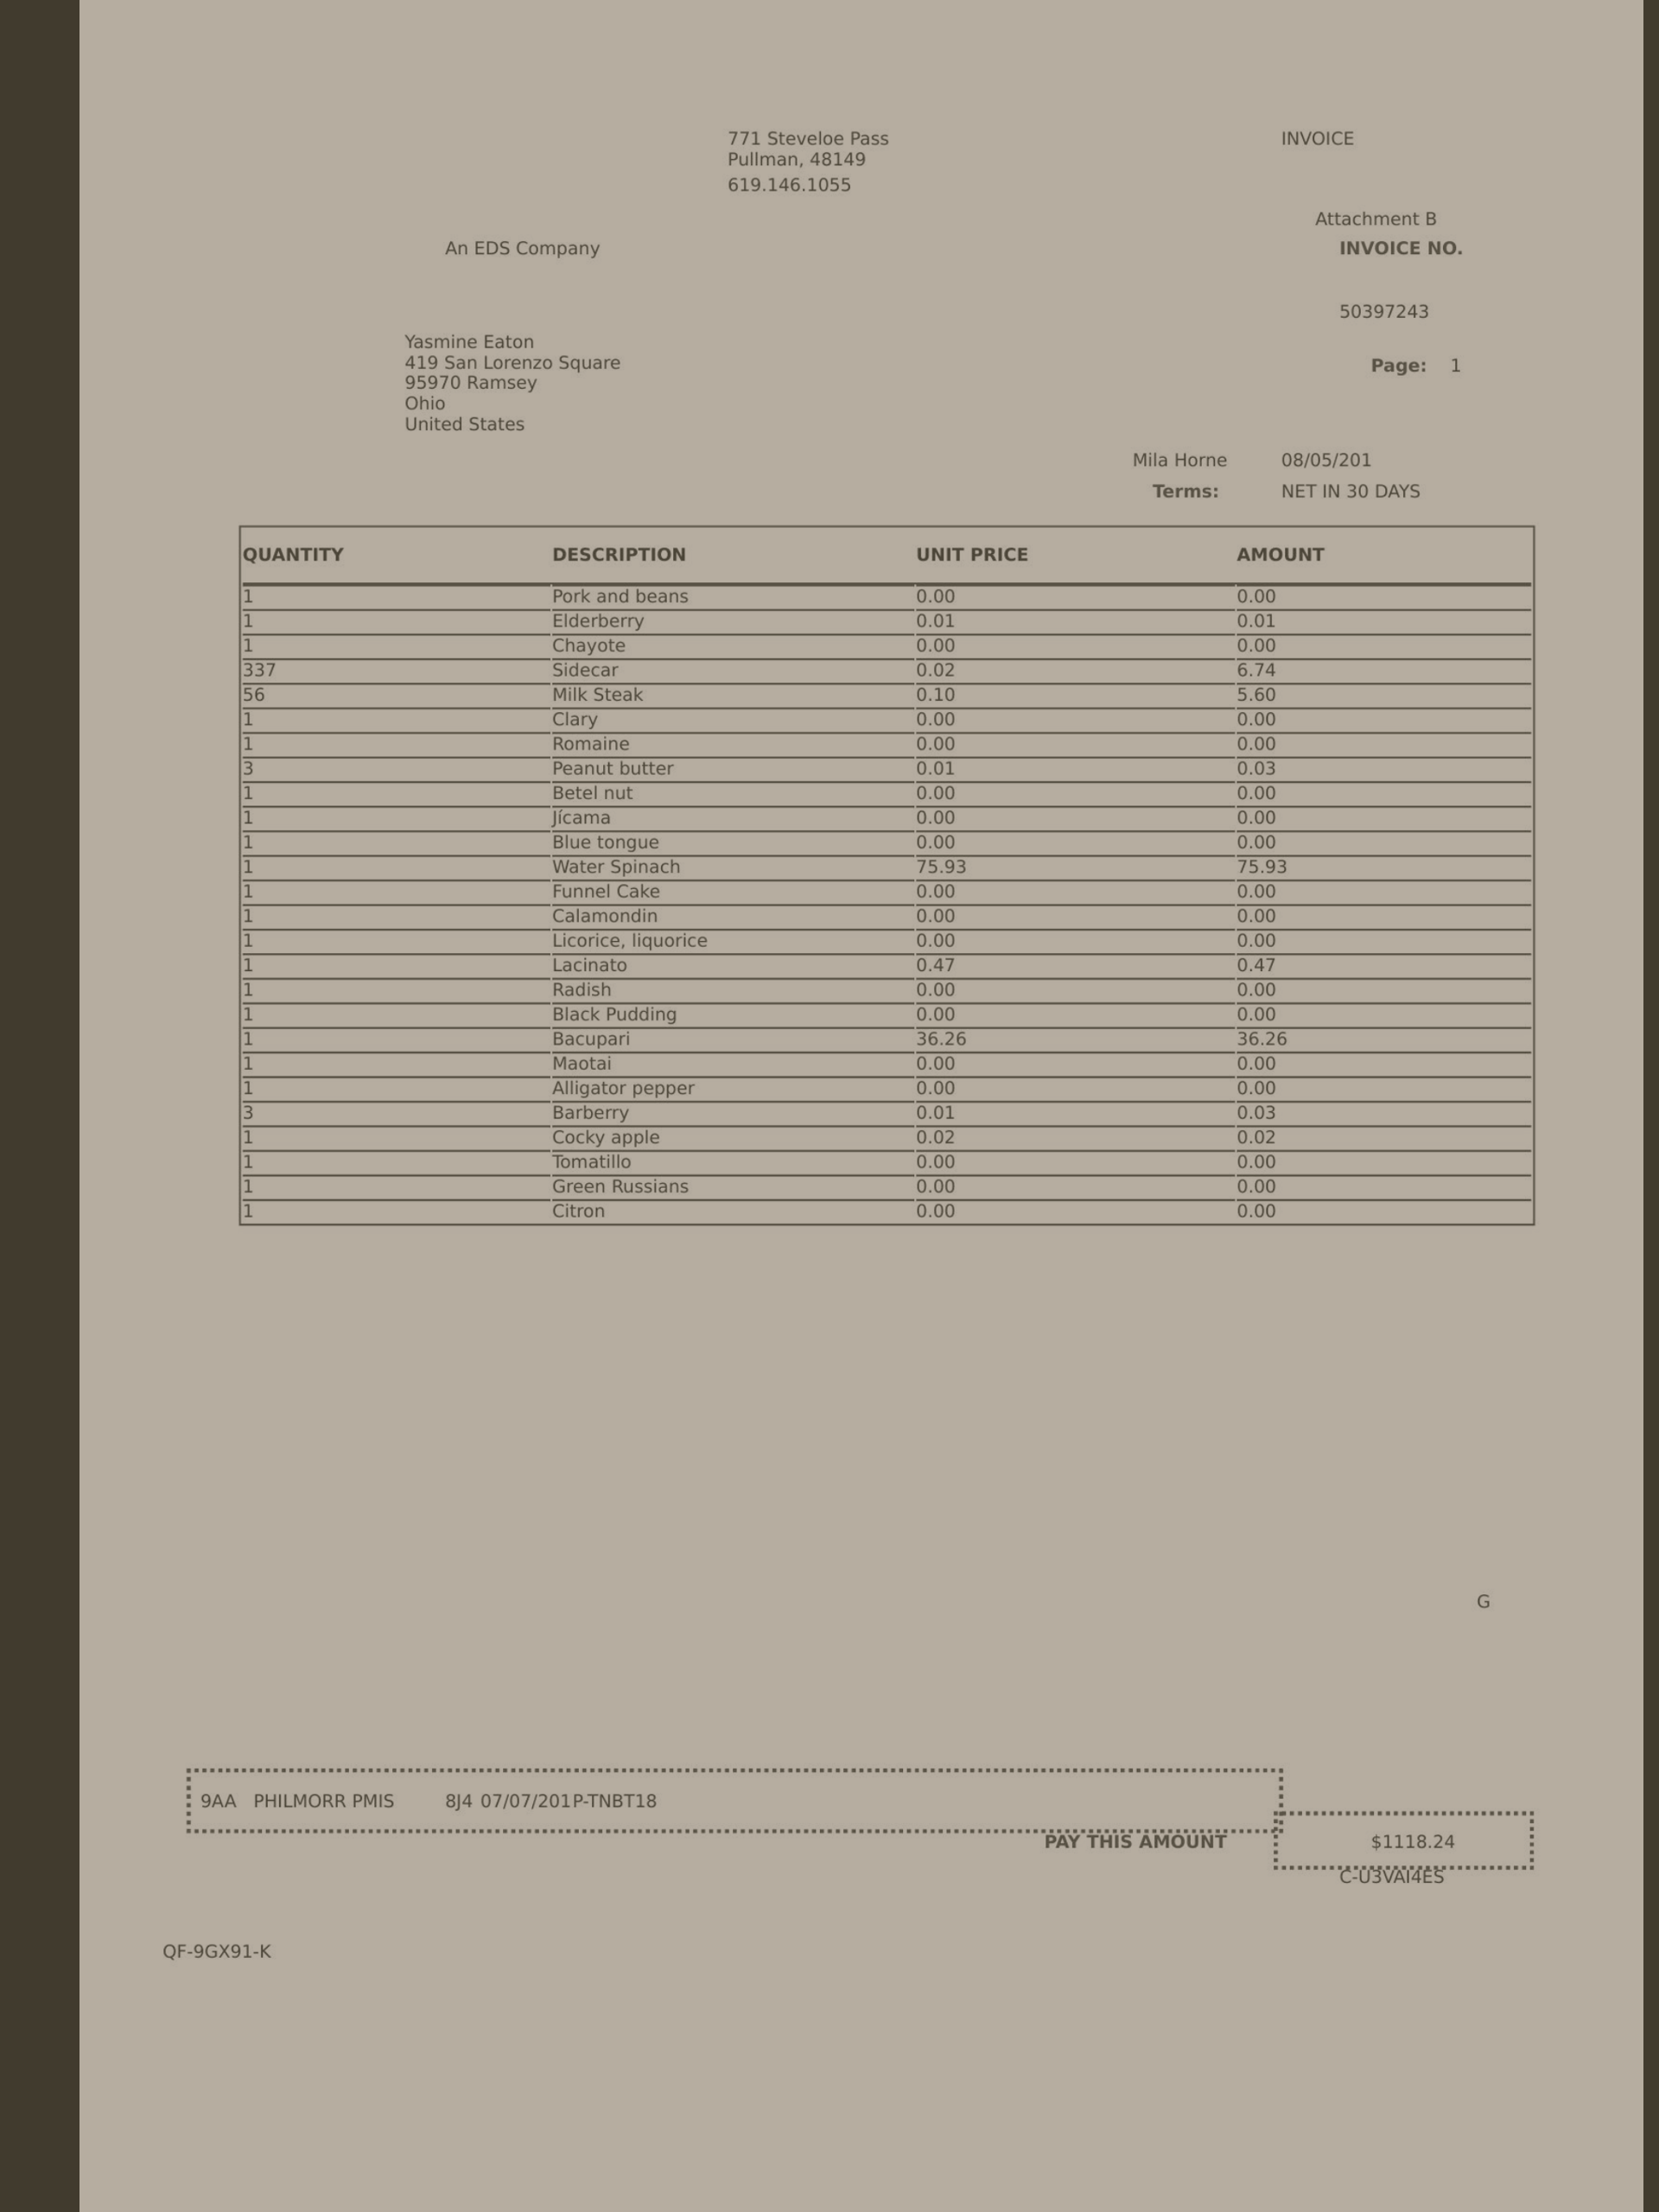

In [18]:
from PIL import Image
import numpy as np

mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

# unnormalize
reconstructed_image = (batch['pixel_values'][0] * torch.tensor(std)[:, None, None]) + torch.tensor(mean)[:, None, None]
# unrescale
reconstructed_image = reconstructed_image * 255
# convert to numpy of shape HWC
reconstructed_image = torch.moveaxis(reconstructed_image, 0, -1)
image = Image.fromarray(reconstructed_image.numpy().astype(np.uint8))
image

## Train the model 

In [21]:
model.config.pad_token_id = processor.tokenizer.pad_token_id
model.config.decoder_start_token_id = processor.tokenizer.convert_tokens_to_ids(['<s_docile>'])[0]

In [22]:
print("Pad token ID:", processor.decode([model.config.pad_token_id]))
print("Decoder start token ID:", processor.decode([model.config.decoder_start_token_id]))

Pad token ID: <pad>
Decoder start token ID: <s_docile>


In [23]:
print(model)

VisionEncoderDecoderModel(
  (encoder): DonutSwinModel(
    (embeddings): DonutSwinEmbeddings(
      (patch_embeddings): DonutSwinPatchEmbeddings(
        (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DonutSwinEncoder(
      (layers): ModuleList(
        (0): DonutSwinStage(
          (blocks): ModuleList(
            (0-1): 2 x DonutSwinLayer(
              (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attention): DonutSwinAttention(
                (self): DonutSwinSelfAttention(
                  (query): Linear(in_features=128, out_features=128, bias=True)
                  (key): Linear(in_features=128, out_features=128, bias=True)
                  (value): Linear(in_features=128, out_features=128, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
           

In [24]:
import torch
from tqdm.auto import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=1e-5)

for epoch in range(2):
    print("Epoch:", epoch+1)
    model.train()
    for i, batch in enumerate(tqdm(train_dataloader)):
        batch = {k: v.to(device) for k, v in batch.items()}
        pixel_values = batch["pixel_values"]
        labels = batch["labels"]

        outputs = model(pixel_values=pixel_values,
                        labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if i % 100 == 0:
            print("Loss:", loss.item())

Epoch: 1


  0%|          | 0/85939 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 150.00 MiB (GPU 0; 23.68 GiB total capacity; 22.66 GiB already allocated; 46.81 MiB free; 22.90 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [25]:
import torch
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score

device = 'cuda' if torch.cuda.is_available() else 'cpu' 
model.to(device)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=1e-5)

for epoch in range(10):
    print("Epoch:", epoch+1)
    model.train()
    
    total_loss = 0.0
    total_accuracy = 0.0
    total_batches = 0
    
    for i, batch in enumerate(tqdm(train_dataloader)):
        batch = {k: v.to(device) for k, v in batch.items()}
        pixel_values = batch["pixel_values"]
        labels = batch["labels"]
        

        optimizer.zero_grad()
        outputs = model(pixel_values=pixel_values, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_batches += 1

        # Calculate accuracy
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        accuracy = accuracy_score(labels.cpu().numpy(), predictions.cpu().numpy())
        total_accuracy += accuracy

        if i % 100 == 0:
            print("Loss:", loss.item())
            print("Accuracy:", accuracy)

    # Calculate average loss and accuracy for the epoch
    average_loss = total_loss / total_batches
    average_accuracy = total_accuracy / total_batches
    print(f"Epoch {epoch+1}: Average Loss: {average_loss}, Average Accuracy: {average_accuracy}")

Epoch: 1


  0%|          | 0/85939 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 150.00 MiB (GPU 0; 23.68 GiB total capacity; 22.57 GiB already allocated; 48.69 MiB free; 22.90 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

## evaluate

In [26]:
import re

model.eval()

dataset = load_dataset("ZaNioxX/DocILE_10_5_ImageClassification_donut", split="test")

output_list = []
accs = []
for idx, sample in tqdm(enumerate(dataset), total=len(dataset)):
    # prepare encoder inputs
    pixel_values = processor(sample["image"].convert("RGB"), return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)
    # prepare decoder inputs
    task_prompt = "<s_docile>"
    decoder_input_ids = processor.tokenizer(task_prompt, add_special_tokens=False, return_tensors="pt").input_ids
    decoder_input_ids = decoder_input_ids.to(device)
    
    # autoregressively generate sequence
    outputs = model.generate(
            pixel_values,
            decoder_input_ids=decoder_input_ids,
            max_length=model.decoder.config.max_position_embeddings,
            early_stopping=True,
            pad_token_id=processor.tokenizer.pad_token_id,
            eos_token_id=processor.tokenizer.eos_token_id,
            use_cache=True,
            num_beams=1,
            bad_words_ids=[[processor.tokenizer.unk_token_id]],
            return_dict_in_generate=True,
        )

    # turn into JSON
    seq = processor.batch_decode(outputs.sequences)[0]
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    seq = re.sub(r"<.*?>", "", seq, count=1).strip()  # remove first task start token
    seq = processor.token2json(seq)

    ground_truth = json.loads(sample["ground_truth"])
    gt = ground_truth["gt_parse"]
    score = float(seq["class"] == gt["class"])

    accs.append(score)

    output_list.append(seq)

scores = {"accuracies": accs, "mean_accuracy": np.mean(accs)}
print(scores, f"length : {len(accs)}")

Resolving data files:   0%|          | 0/32 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/21483 [00:00<?, ?it/s]

/home/sebastian/anaconda3/envs/pt/lib/python3.9/site-packages/transformers/generation/utils.py:1411: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation )
  warnings.warn(
/home/sebastian/anaconda3/envs/pt/lib/python3.9/site-packages/transformers/generation/configuration_utils.py:399: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


OutOfMemoryError: CUDA out of memory. Tried to allocate 150.00 MiB (GPU 0; 23.68 GiB total capacity; 22.63 GiB already allocated; 56.69 MiB free; 22.90 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF